## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

## Load datsets

In [14]:
X_train = np.load("X_train_selected.npy")
X_test = np.load("X_test_selected.npy")
y_train = np.load("y_train_res.npy")
y_test = np.load("y_test.npy")

## Logistic Regression

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

       False       0.39      0.42      0.41        90
        True       0.74      0.72      0.73       210

    accuracy                           0.63       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.64      0.63      0.63       300

ROC AUC: 0.5880423280423281


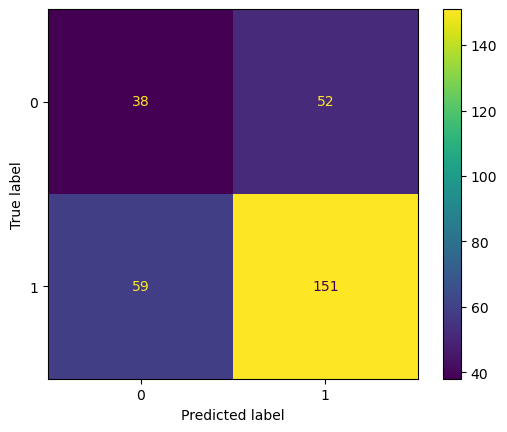

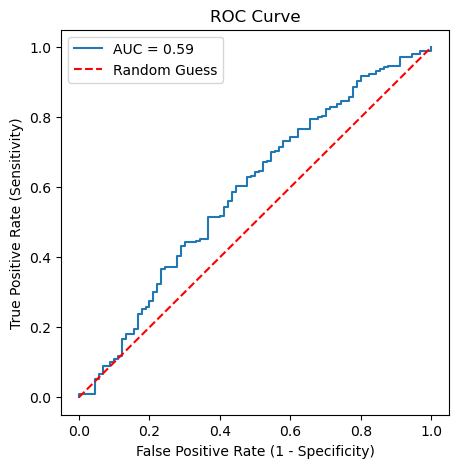

In [17]:
# Initialize Logistic Regression model
lr = LogisticRegression(random_state=123, max_iter=5000)

# Define the parameter grid 
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] 
}

# Perform GridSearchCV with 5-fold cross-validation
# Scoring can be adjusted depending on your problem: 'roc_auc', 'f1', 'precision', etc.
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Get the best estimator
best_model_lr = grid_search.best_estimator_

# Predictions
pred_lr = best_model_lr.predict(X_test)

# Predicted probabilities (needed for ROC and AUC)
prob_pred = best_model_lr.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prob_pred)

# Classification report
print(classification_report(y_test, pred_lr))

# ROC AUC score
print('ROC AUC:', roc_auc_score(y_test, prob_pred))

# Confusion matrix
cm = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Plotting ROC curve
plt.subplots(1, figsize=(5, 5))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, prob_pred):.2f}")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], ls="--", c='red', label="Random Guess")  # diagonal line
plt.legend()
plt.show()

## Decision Tree Classifier

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 20, 'splitter': 'best'}
              precision    recall  f1-score   support

       False       0.40      0.42      0.41        90
        True       0.75      0.73      0.74       210

    accuracy                           0.64       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.64      0.64      0.64       300

ROC AUC: 0.5813756613756613


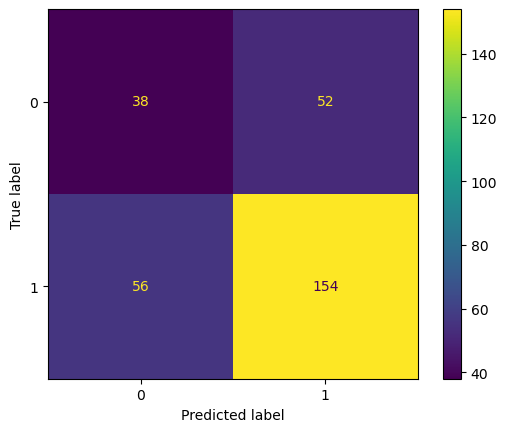

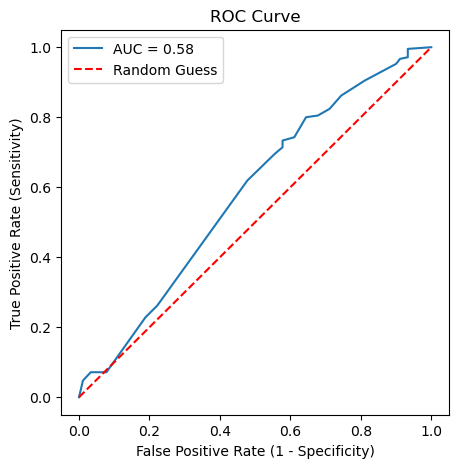

In [18]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# GridSearchCV setup
# Use scoring='roc_auc' if classes are imbalanced for better evaluation
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best estimator
best_model_dt = grid_search.best_estimator_

# Predictions
pred_dt = best_model_dt.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Predicted probabilities for ROC and AUC
prob_pred = best_model_dt.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prob_pred)

# Classification report
print(classification_report(y_test, pred_dt))

# ROC AUC score
print('ROC AUC:', roc_auc_score(y_test, prob_pred))

# Plotting ROC curve
plt.subplots(1, figsize=(5,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, prob_pred):.2f}")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], ls="--", c='red', label="Random Guess")  # diagonal line
plt.legend()
plt.show()

## Random Forest Classifier

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

       False       0.43      0.38      0.40        90
        True       0.75      0.79      0.77       210

    accuracy                           0.66       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.65      0.66      0.66       300

ROC AUC: 0.6094973544973544


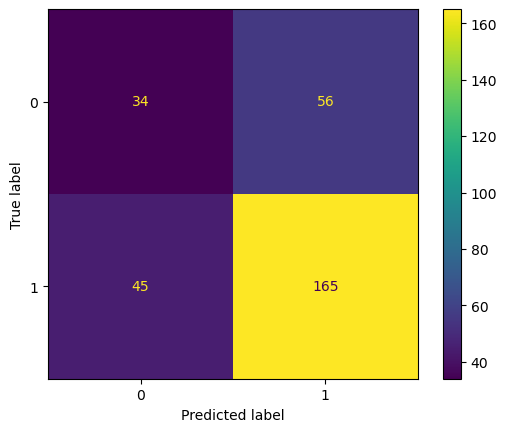

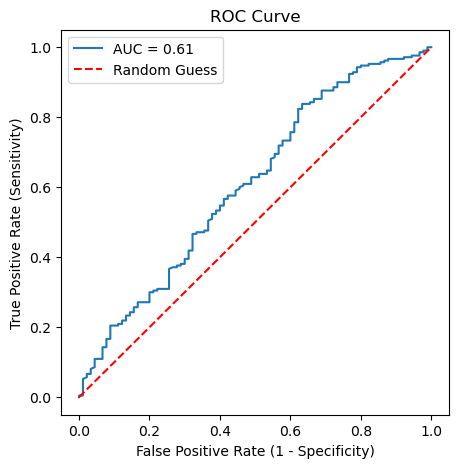

In [19]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, 25, 30],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# GridSearchCV setup
# Use scoring='roc_auc' if classes are imbalanced for better evaluation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best estimator
best_model_rf = grid_search.best_estimator_

# Predictions
pred_rf = best_model_rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Predicted probabilities for ROC and AUC
prob_pred = best_model_rf.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prob_pred)

# Classification report
print(classification_report(y_test, pred_rf))

# ROC AUC score
print('ROC AUC:', roc_auc_score(y_test, prob_pred))

# Plotting ROC curve
plt.subplots(1, figsize=(5,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, prob_pred):.2f}")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], ls="--", c='red', label="Random Guess")  # diagonal line
plt.legend()
plt.show()

- Random Forest achieved the best overall accuracy (0.66). This is expected, as it combines multiple decision trees to reduce variance and improve overall performance.

- For the True class (majority class), Random Forest is the clear winner. It has the highest Recall (0.79) and the best F1-Score (0.77), meaning it was the most effective at identifying positive cases overall.

- For the False class (minority class), Logistic Regression and Decision Tree performed slightly better in terms of Recall (0.42), indicating that they can identify a slightly higher proportion of true negative cases compared to Random Forest.

- Random Forest also stands out with the highest AUC value (0.61). This suggests that, overall, Random Forest is the best model for distinguishing between True and False classes in a variety of scenarios.

- The Random Forest model proved to be the best classifier for this credit risk problem. It presented the highest overall accuracy and the best performance for the majority class, which is crucial for identifying risk cases. Decision Tree and Logistic Regression performed very similarly, with Decision Tree slightly outperforming in accuracy for the True class and Logistic Regression in identifying the False class.